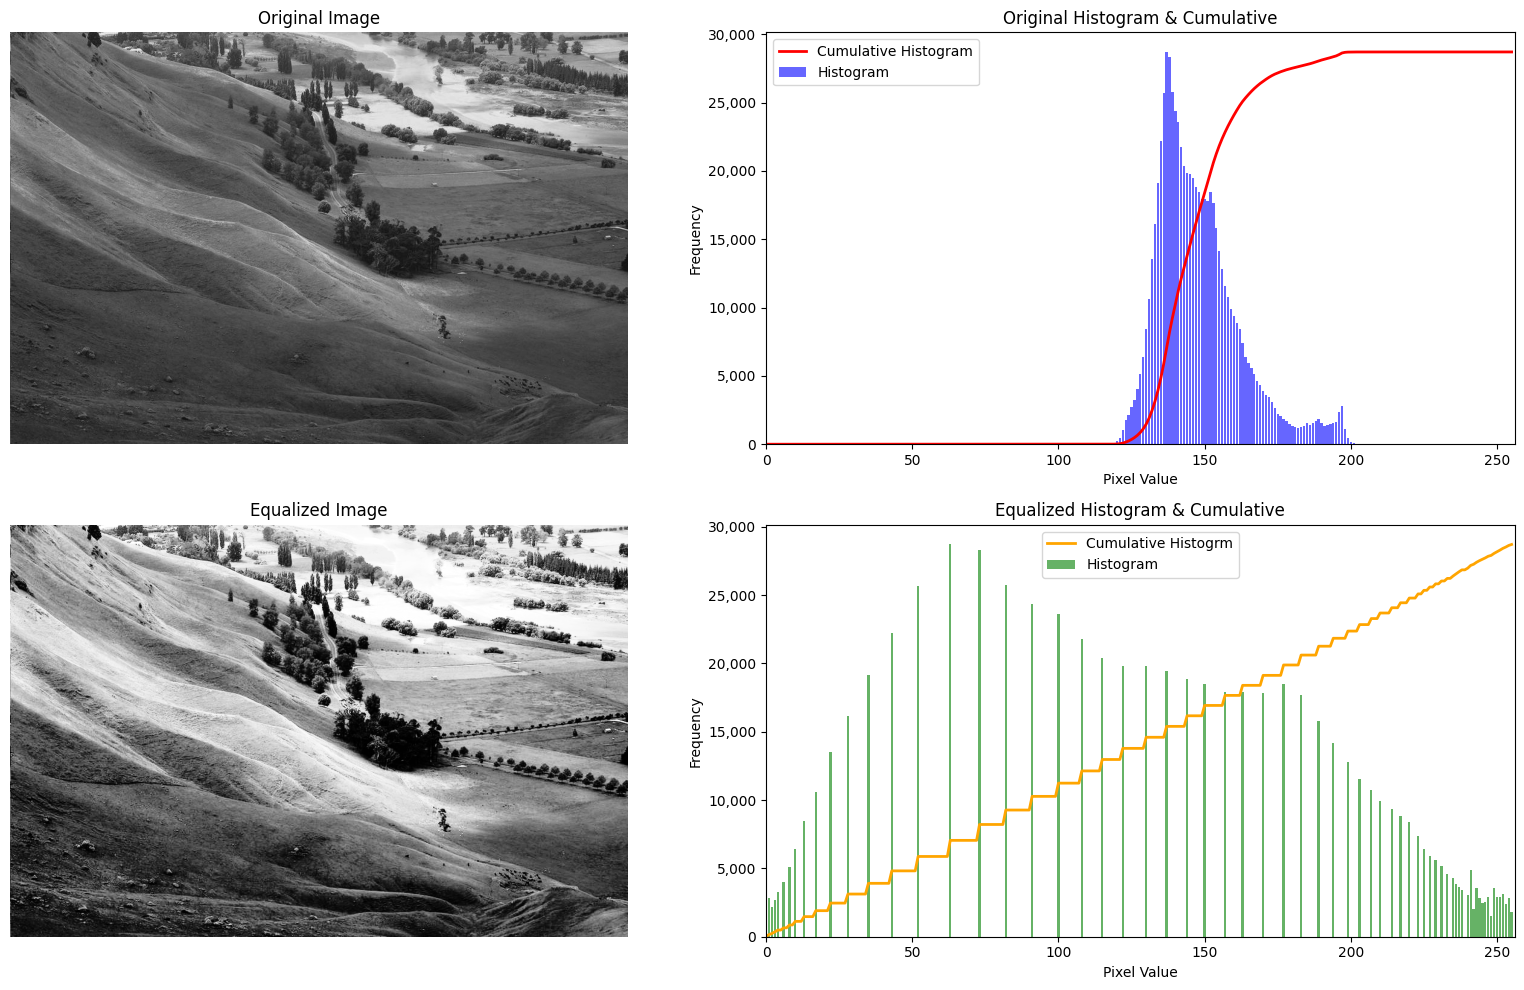

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 이미지 읽기 (그레이스케일로)
image = cv2.imread('histogram_example.jpg', cv2.IMREAD_GRAYSCALE)

# 히스토그램 평활화 적용
equalized_image = cv2.equalizeHist(image)

# 히스토그램 계산
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# 누적 히스토그램 계산
original_cum_hist = np.cumsum(original_hist)
equalized_cum_hist = np.cumsum(equalized_hist)

# 누적 히스토그램을 최대 빈도수에 맞추어 정규화
original_cum_hist_normalized = (original_cum_hist / original_cum_hist.max()) * original_hist.max()
equalized_cum_hist_normalized = (equalized_cum_hist / equalized_cum_hist.max()) * equalized_hist.max()

# 시각화
plt.figure(figsize=(16, 10))

chart_idx = 0  # 서브플롯 인덱스 초기화

# 원본 이미지
plt.subplot(2, 2, chart_idx := chart_idx + 1)
plt.title("Original Image")
plt.axis('off')  # 축 제거
plt.imshow(image, cmap='gray')

# 원본 이미지 히스토그램 및 누적 히스토그램
plt.subplot(2, 2, chart_idx := chart_idx + 1)
plt.title("Original Histogram & Cumulative")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(range(256), original_hist.ravel(), color='blue', alpha=0.6, label='Histogram')
plt.plot(original_cum_hist_normalized, color='red', label='Cumulative Histogram', linewidth=2)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))
plt.xlim([0, 256])
plt.legend()

# 평활화된 이미지
plt.subplot(2, 2, chart_idx := chart_idx + 1)
plt.title("Equalized Image")
plt.axis('off')  # 축 제거
plt.imshow(equalized_image, cmap='gray')

# 평활화된 이미지 히스토그램 및 누적 히스토그램
plt.subplot(2, 2, chart_idx := chart_idx + 1)
plt.title("Equalized Histogram & Cumulative")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(range(256), equalized_hist.ravel(), color='green', alpha=0.6, label='Histogram')
plt.plot(equalized_cum_hist_normalized, color='orange', label='Cumulative Histogrm', linewidth=2)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))
plt.xlim([0, 256]) 
plt.legend()


# 레이아웃 정리 및 출력
plt.tight_layout()
plt.show()
